<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_Data-AI/blob/master/HWlesson2_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Homework2: Due to Oct 5, 2020.
# Notice: You will use your google drive, where you can store downloaded data 
# permanantly. To use the google drive data in your colab notebook,
# you need to mount or connect your google drive  to the /content/gdrive folder of your remote 
# machine located in the colab server; if have problems with using google dirve, please 
# contact your TA.
from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [4]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### upload urls file into /content folder

Question 1: Search the "google image"  for some kind of images of YOUR choice ( You would not want to search for bears, for example, because they are used in the notebook. Also you would not want to use the same kind of images that are found in many example notebooks in the internet).  and Scroll down to the maximum. It will  show 700 images at the maximum. Download their urls into download folder of your PC. Rename the names of the files as black_urls.cvs, for example. Move the files into your google drive. 

Question 2. Please verify that your google drive is connected to content/gdrive folder in your colab machine, as shown in the following picture. Please capture your own folder structure and insert the captured image into your notebook.
With this connection between /content/gdrive folder and your google drive, colab notebook can read  *.csv files from your google drive. ![alt text](https://drive.google.com/uc?id=1ObEUZxFDnXiK47lK_Lkg8z0e0Fe1T-QM)

My Image:
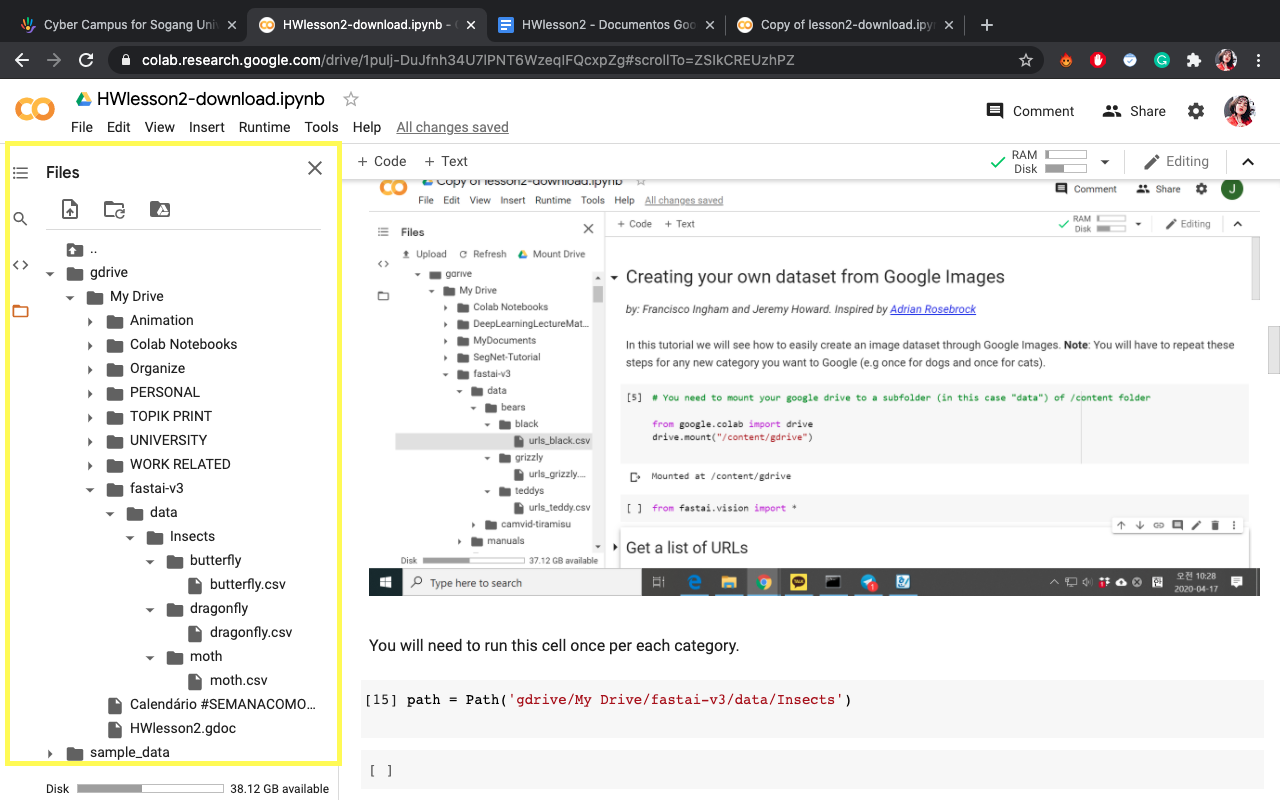

You will need to run this cell once per each category.

In [ ]:
path = Path('gdrive/My Drive/fastai-v3/data/Insects')


In [ ]:
print (path)

gdrive/My Drive/fastai-v3/data/Insects


In [ ]:
path.ls()
# Question 3: See what the above statement produces. The names of 'bears/ folders convery important
# information about your dataset. What is this information? 

#The output of path.ls() refers particular folders but they also contain categories or 
#labels for the images that our notebook classifies, in this case, a given insect image 
#into one of 3 categories: moth, butterfly or dragonfly.  


[PosixPath('gdrive/My Drive/fastai-v3/data/Insects/butterfly'),
 PosixPath('gdrive/My Drive/fastai-v3/data/Insects/dragonfly'),
 PosixPath('gdrive/My Drive/fastai-v3/data/Insects/moth')]

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [ ]:
classes = ['butterfly','dragonfly','moth']

In [ ]:
# You will need the following statement  for every category.
# For example, Do this when downloading "urls_teddy.csv' file:
folder = 'butterfly'
dest = path/folder
file = 'butterfly.csv'

# Noteice: You will try each of the following statements; It means
# you will use different datasets whose item sizes are 100, 300, and 700,
# see how they affects the results of the supervised learning. 

#download_images(dest/file, dest, max_pics=100)
#download_images(dest/file, dest, max_pics=300)
#download_images(dest/file, dest, max_pics=700)

# Question 4: 
#(4.1) What does statement download_images() do?
#it downloads the pictures from a particular category to that folder.
#in this case, butterfly pictures from the URLs contained in the butterfly.csv file

# (4.2) What do you find in dest = path/folder BEFORE  you execute this statement?
#  the list of image urls of that folder's category, in this case, "butterfly.csv" 

# (4.3) What do you find in dest = path/folder AFTER  you execute this statement?
# a list of file names in that folder, the number of file names depends on max_pics

# (4.4) How many pictures are there in the folder dest = path/folder? How was this number determined?
# The number of pictures depends on max_pics, in this case either 100, 300 or 700
# this number was determined in the previous statement "download_images(dest/file, dest, max_pics=100)"
# the part which determines this number is "max_pics=100"

In [ ]:
dest

PosixPath('gdrive/My Drive/fastai-v3/data/Insects/butterfly')

In [ ]:
dest.ls()

[PosixPath('gdrive/My Drive/fastai-v3/data/Insects/butterfly/butterfly.csv')]

In [ ]:
download_images(dest/file, dest, max_pics=700)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(dest/file, dest, max_pics=20, max_workers=0)
# cf: Having more workers will increase the memory usage and that’s the most serious overhead. 
# I’d just experiment and launch approximately as many as are needed to saturate the training. It depends on the batch size, but I wouldn’t set it to the same number - each worker loads a single batch and returns it only once it’s ready.
#num_workers equal 0 means that it’s the main process that will do the data loading when needed.
# For more information about num_works, refer to https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813


In [ ]:
folder = 'dragonfly'
dest = path/folder
file = 'dragonfly.csv'
#download_images(dest/file, dest, max_pics=100)
#download_images(dest/file, dest, max_pics=300)
download_images(dest/file, dest, max_pics=700)

In [ ]:
folder = 'moth'
dest = path/folder
file = 'moth.csv'
#download_images(dest/file, dest, max_pics=100)
#download_images(dest/file, dest, max_pics=300)
download_images(dest/file, dest, max_pics=700)

Then we can remove any images that can't be opened:

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

butterfly


dragonfly


moth


## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
                                                                    
# Question 5: ImageDataBunch class is used to construct the datasets, 
# e.g. the train dataset and the validation dataset. 
# The train dataset and the validation dataset have the data items and their labels (categories)
# In this case, we use from_folder() method to construct the datasets. 
# (5.1) The used method for constructing the datasets depends on how the downloaded original dataset is
# organized. Why do we use from_folder() method in this notebook?
#If we used a dataset from Kaggle or from an academic dataset, there would 
#probably be folders called train, valid, and test containing these datasets. In this 
#case, we just grabbed images from Google, so we don't have a separate validation 
#set. To create a proper data bunch, we will use the from_folder() method to create 
#the training set using data in the current folder and set aside 20% of the data to 
#create a validation set randomly. 

# (5.2) What does valid_pct (= validation percentage )  indicate?
#It indicates we are setting aside 20% of this folder's data, to create a validation set 
#automatically and randomly.

# (5.3) What does size=224 indicate?
#The "ds_tfms=get_transforms(), size=224" part makes all of our data the same size,  
#in this case a square image of 224*224.



In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [ ]:
data

ImageDataBunch;

Train: LabelList (773 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
butterfly,butterfly,butterfly,butterfly,butterfly
Path: gdrive/My Drive/fastai-v3/data/Insects;

Valid: LabelList (193 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
butterfly,dragonfly,moth,dragonfly,butterfly
Path: gdrive/My Drive/fastai-v3/data/Insects;

Test: None

In [ ]:
len(data.valid_ds.y)


     

193

In [ ]:
data.classes

['butterfly', 'dragonfly', 'moth']

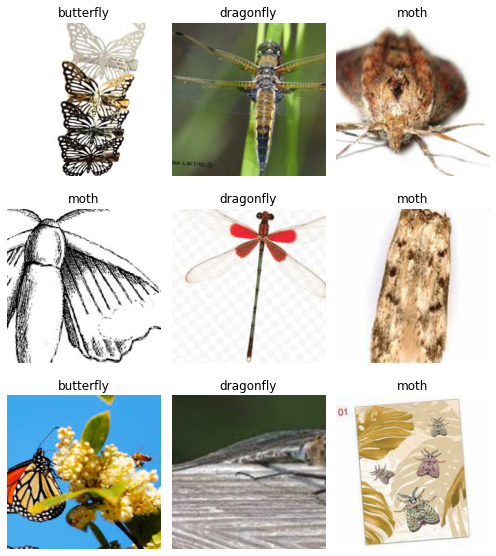

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['butterfly', 'dragonfly', 'moth'], 3, 773, 193)

## Train model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
  

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Images for Question 6:

*   (6.1) Perform this statement for the dataset size =100
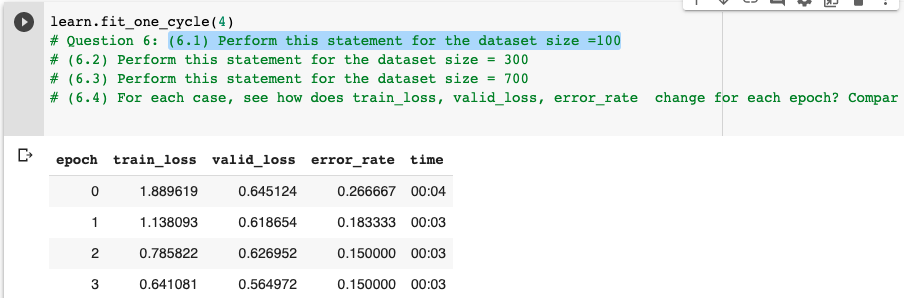
*   (6.2) Perform this statement for the dataset size = 300
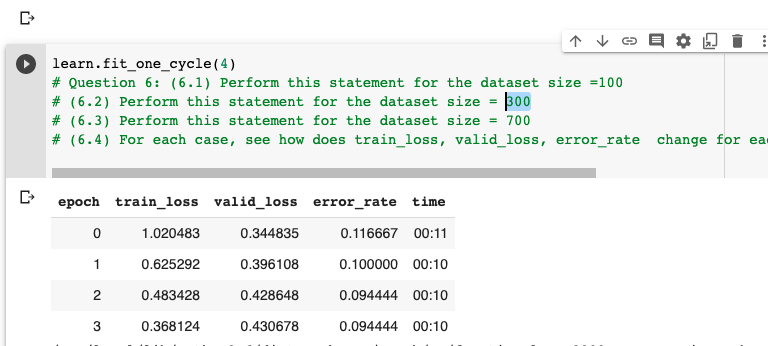
*   (6.3) Perform this statement for the dataset size = 700
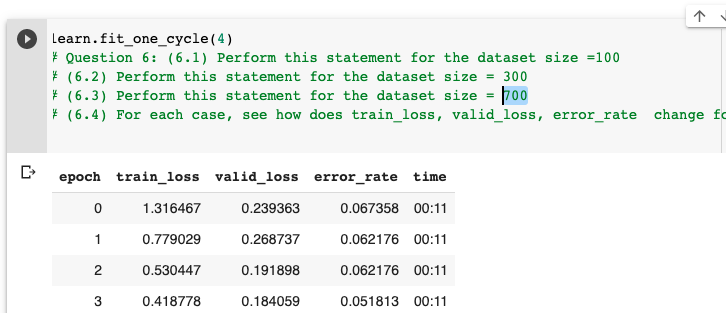


In [ ]:
learn.fit_one_cycle(4)
# Question 6: (6.1) Perform this statement for the dataset size =100
# (6.2) Perform this statement for the dataset size = 300
# (6.3) Perform this statement for the dataset size = 700
# (6.4) For each case, see how does train_loss, valid_loss, error_rate  change for each epoch? Compare them.
 
#After experimenting with different-sized datasets, we can notice the relation of test 
#accuracy vs data set size. The train_loss, valid_loss, error_rate  values show a 
#steady improvement in test accuracy as the data size goes up. We can see a sharp 
#increase in test accuracy from 100 to 300 images, but by 700 images, it appears to level 
#off.  As expected, too little training data results in a poor approximation, so a bigger 
#amount of data is preferred. However, too much data might as well overfit the training 
#data, also resulting in poor performance.



epoch,train_loss,valid_loss,error_rate,time
0,1.316467,0.239363,0.067358,00:11
1,0.779029,0.268737,0.062176,00:11
2,0.530447,0.191898,0.062176,00:11
3,0.418778,0.184059,0.051813,00:11


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Images for Question 7

Matrix for 100 data set

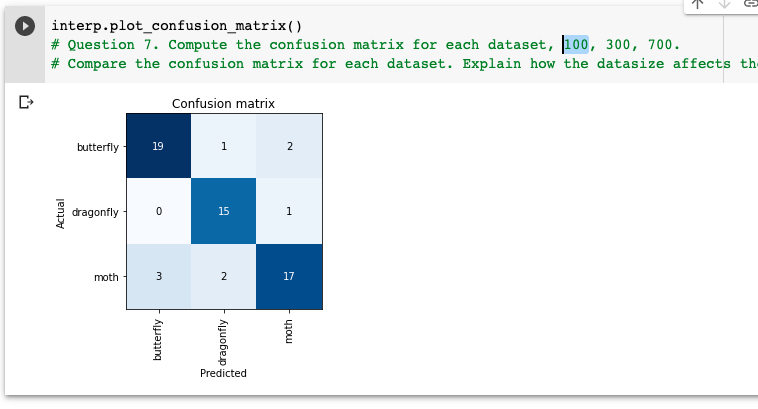

Matrix for 300 data set

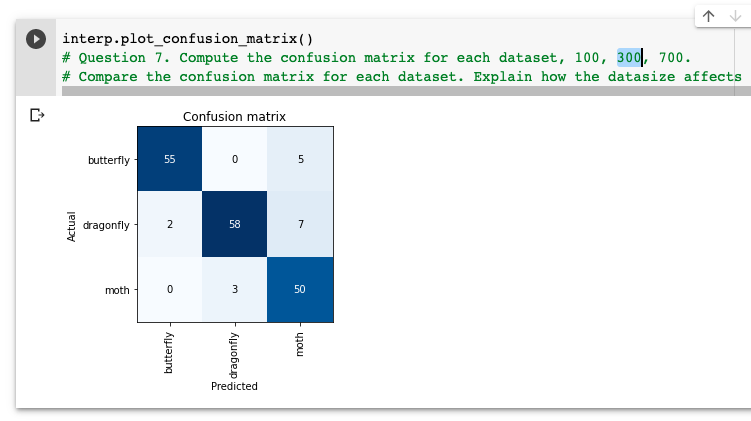

Matric fo 700 data set

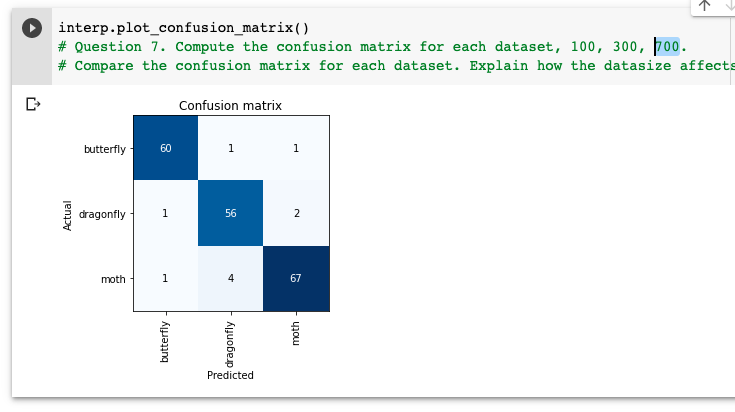

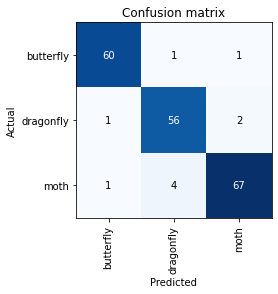

In [ ]:
interp.plot_confusion_matrix()
# Question 7. Compute the confusion matrix for each dataset, 100, 300, 700.
# Compare the confusion matrix for each dataset. Explain how the datasize affects the confusion matrix.  
# The diagonal of the confusion matrix basically shows how many times the model 
#predicted correctly. In this case, we can notice that the numbers in the diagonal 
#improve as more data is provided to the model. Therefore, proving more data can 
#increase our model's accuracy. However, there is a point where even adding infinite 
#data can not improve the performance of our model. Therefore, we should focus on 
#using available data wisely and avoid overfitting.
